In [87]:
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt
from itertools import accumulate
import sys

# Guideline for the term project
Your term project should include the detailed procedures on how to calculate the stress
development of concrete element measured in the field over time. The effect of creep on the
stress development should be considered. Your project should include developing the
program using Matlab.

### Material properties
Coefficient of thermal expansion of concrete = 3.44×10-6/°F

The measured average compressive strength at 28 days = 28 MPa

Normal Portland cement was used in concrete mixture

Drying shrinkage can be ignored


### Creep-related parameters
RH = 50 %

h0 = 400 mm

Concrete element considered is assumed to be within service stress ranges

### Additional remarks
The setting time was 03-05-07 15:11.

The measured concrete element can be idealized as one dimensional bar element. 

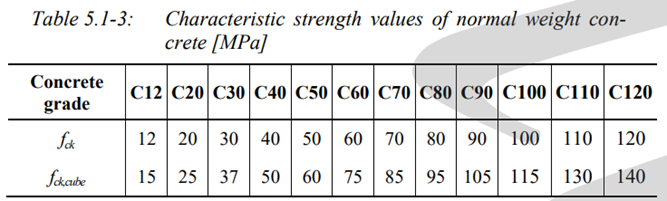

In [94]:
Image(filename='fig1.png')

![alt text](fig3.jpg "Title")

![alt text](cover.jpg "Title")

In [88]:
# Data file import
filename_data   = 'Strain_Temperature.csv'

data            = np.genfromtxt(filename_data, delimiter=',')

number_data     = data.shape[0]

age             = data[:, 0]
total_strain    = data[:, 1]
temperature     = data[:, 2]

print('number of data = ', number_data)

# given Material properties
fcm             = 28
alpha_T         = 3.44e-6
fck             = 20
# given Creep related parameters
RH              = 50
h0              = 400


# F --> C
T               = (temperature-32) * 1.8
delta_t         = data[1:2, 0]
# T_delta_t 
def T_delta_t(temperature):
    b = []
    for i in range(0,data.shape[0], 1):
        if (i == data.shape[0]-1):
            b.append(temperature[i])
        else:
            b.append((temperature[i] + temperature[i+1])/2)

    return b;

### Maturity
tT              = delta_t * np.exp(13.655 - (4000 / (273+np.array(T_delta_t(temperature))))) 
t               = np.cumsum(tT)


# Effect of type of cement and curing temperature
t0              = np.array(t)[96]  #tT 로 나온 t0값으로 변환

number of data =  1542


![alt text](fig2.png "Title")

In [89]:
# development of strength with time 
s               = 0.25 # strength class of cement --> 42.5N
beta_cc         = np.exp((1-np.sqrt(28/np.array(t))) * s)
fcm_t           = beta_cc * fcm

# np.set_printoptions(threshold=sys.maxsize)
# print("tT = ", tT)
# print("tT = ", tT.shape)
# print("t = ", t)
# print("t0 = ", t0)

C:\Users\TaeKyung Kim\AppData\Local\Temp\ipykernel_28856\1383235778.py:18: RuntimeWarning: invalid value encountered in power
  beta_c_tt0       = ((t-t0)/ (beta_H + (t - t0)))**0.3


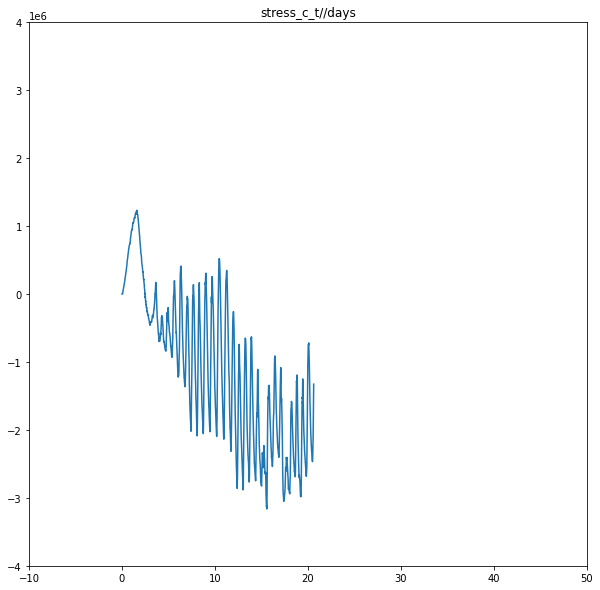

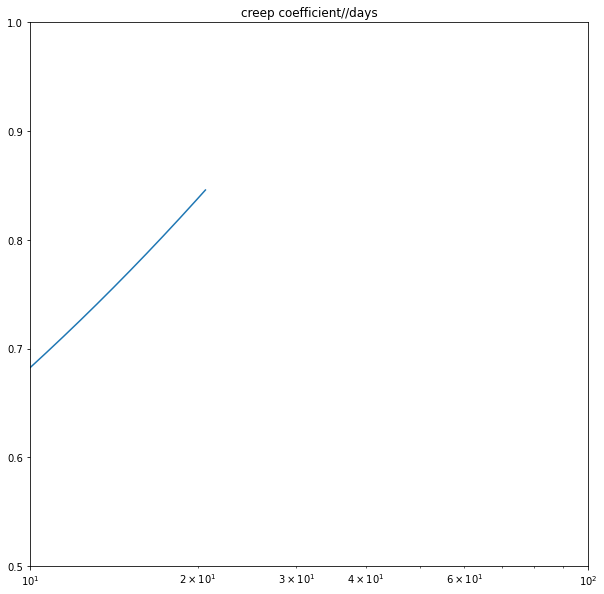

In [90]:
### Tensile stress
E_c0             = 21.5e3
alpha_E          = 1.0
E_ci             = E_c0 * alpha_E * ((fck + 8)/10)**(1/3)
strain_c_t       = total_strain
stress_c_t       = E_ci * strain_c_t  # for stress_ct <= 0.9 * fctm

plt.figure(figsize=(10,10))
plt.title('stress_c_t//days')
plt.plot(t, stress_c_t)
plt.axis([-10, 50, -4000000, 4000000])

### Creep coefficient
phi_RH           = 1 + ((1 - (RH/100)) / (0.1*400**(1/3)))  # for fcm =< 35N/mm^2  
beta_fcm         = 16.8/np.sqrt(28)
beta_t0          = 1/(0.1 + 28**0.2)
beta_H           = 1.5 * (1 + (0.012 * RH)**18) * h0 + 250  # for fcm =< 35N/mm^2
beta_c_tt0       = ((t-t0)/ (beta_H + (t - t0)))**0.3
phi_0            = phi_RH * beta_fcm * beta_t0
phi_tt0          = phi_0 * beta_c_tt0

plt.figure(figsize=(10,10))
plt.title('creep coefficient//days')
plt.plot(t, phi_tt0)
plt.axis([10, 100, 0.5, 1])
plt.xscale("log")



# Stress dependent strain by temperature
beta_cc_t0       = np.exp((1-np.sqrt(28/t0)) * s)
beta_E_t0        = np.sqrt(beta_cc_t0)
E_ci_t0          = beta_E_t0 * E_ci
strain_ci_t0     = data[1:2 , 1]
stress_c_t0      = E_ci_t0 * strain_ci_t0
strain_csigma    = strain_ci_t0 + stress_c_t0 * (phi_tt0 / E_ci)  # sigma_c_t0 * (1/E_ci_t0 + phi_tt0 / E_ci) = sigma * J


In [91]:
# Thermal expansion
lamda_T = np.diff(temperature, n= 1, axis = 0)

print(lamda_T)
beta_T         = np.exp(1500/(273+T) - 5.12)
beta_HT        = beta_H * beta_T
phi_T          = np.exp(0.015 * (T - 20))
phi_RH_T       = phi_T + (phi_RH - 1) * (phi_T**1.2)

phi_tt0_T      = phi_0 * beta_c_tt0 + 0.0004 * (T - 20)**2
strain_cT      = alpha_T * lamda_T


# Total strain
strain_cc      = sigmac * phi / E_ci
strain_c_t     = strain_cc + strain_cT # + strain_cs, strain_ci = 0



print("E_ci = ", E_ci)

print("strain_cc = ", strain_cc)



[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

NameError: name 'sigmac' is not defined

![alt text](fig4.jpg "Title")
![alt text](fig5.jpg "Title")
![alt text](fig6.jpg "Title")

![alt text](fig7.jpg "Title")
![alt text](fig8.jpg "Title")
![alt text](fig9.jpg "Title")

![alt text](fig10.jpg "Title")
![alt text](fig11.jpg "Title")
![alt text](fig12.jpg "Title")
![alt text](fig13.jpg "Title")
![alt text](fig14.jpg "Title")


![alt text](fig15.jpg "Title")
![alt text](fig16.jpg "Title")

![alt text](fig18.jpg "Title")

In [ ]:
# 외부에 하중이 없고 응력을 유발시키는건 열만 --> 구속에 의해 응력 발생 

# 크립의 하중항에 열에 대한걸 대입 
